In [1]:
import math

import pandas as pd
import tifffile
import scanpy as sc
import numpy as np
from PIL import Image
from sklearn.metrics import adjusted_rand_score

sc.set_figure_params(scanpy=True, dpi=80, dpi_save=400, frameon=True, vector_friendly=False, fontsize=12, figsize=(8, 4), color_map=None, format='eps', facecolor=None, transparent=True, ipython_format='png2x')

In [3]:
### set file folder
filepath='D:/st_projects/data/Starmap/'

### read dapi: col, row, z
dapi = tifffile.imread(filepath+'BY3_dapi.tiff')
# dapi = Image.fromarray(dapi)

spots = pd.read_csv(filepath + 'BY3_raw.csv')
spots.columns = ['gene_name', 'spot_location_1', 'spot_location_2', 'spot_location_3']
genes = pd.DataFrame(spots['gene_name'].unique())
a1 = list(genes[0])
gene = list(map(lambda x: a1.index(x)+1, spots['gene_name']))
spots['gene'] = gene
spots['gene'] = spots['gene'].astype('int')

In [39]:
count_data = pd.read_csv('D:/st_projects/data/Starmap/Clustermap/generated_count_matrix.csv', index_col=0).values
count_data

array([[1.6792425 , 1.96095222, 4.11396098, ..., 0.        , 0.        ,
        0.        ],
       [0.67667234, 1.76414866, 3.85928388, ..., 0.        , 0.        ,
        0.        ],
       [0.37688177, 2.72061696, 3.99077702, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 2.7293276 , 3.53861905, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 2.26398555, 2.90376601, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.63141682, 3.24519313, ..., 0.        , 0.        ,
        0.        ]])

In [40]:
spatial_location = pd.read_csv('D:/st_projects/data/Starmap/Clustermap/spatial.csv', index_col=0).values
spatial_location

array([[   69.93320236,   266.11001965],
       [   43.67973856,   685.21132898],
       [  217.62164948,   730.43402062],
       ...,
       [16874.13978495,  3459.6702509 ],
       [17120.43203883,  3341.49514563],
       [16933.2962963 ,  3418.71296296]])

In [41]:
import anndata

adata = anndata.AnnData(X=count_data, var=pd.DataFrame(index=genes))
adata

C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\anndata\_core\anndata.py:183: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 817 × 1020

In [42]:
adata.obsm['spatial'] = spatial_location
adata.obs['tissue_id_refine'] = pd.read_csv('D:/st_projects/data/Starmap/Clustermap/generated_tissue_id.csv', index_col=0).values

In [43]:
adata.obs['tissue_id_refine'] = pd.read_csv('D:/st_projects/data/Starmap/Clustermap/tissue_id_refine.csv', index_col=0).values
adata.obs['tissue_id_refine'] = adata.obs['tissue_id_refine'].astype('category')

C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


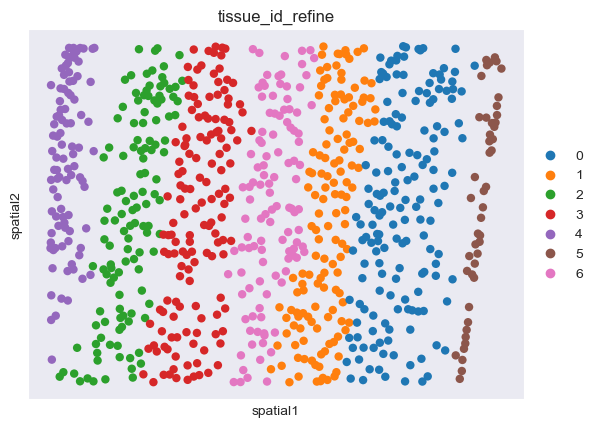

In [44]:
sc.pl.embedding(adata, basis='spatial', color=['tissue_id_refine'])

In [45]:
adata.obs

,tissue_id_refine
0,4
1,4
2,4
3,2
4,2
...,...
812,5
813,5
814,5
815,5


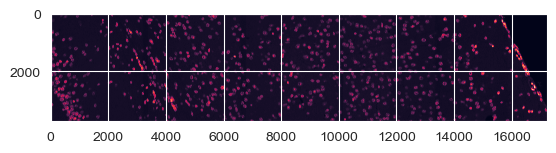

In [46]:
import matplotlib.pyplot as plt
plt.imshow(dapi)
plt.show()

Text(0.5, 1.0, 'raw data')

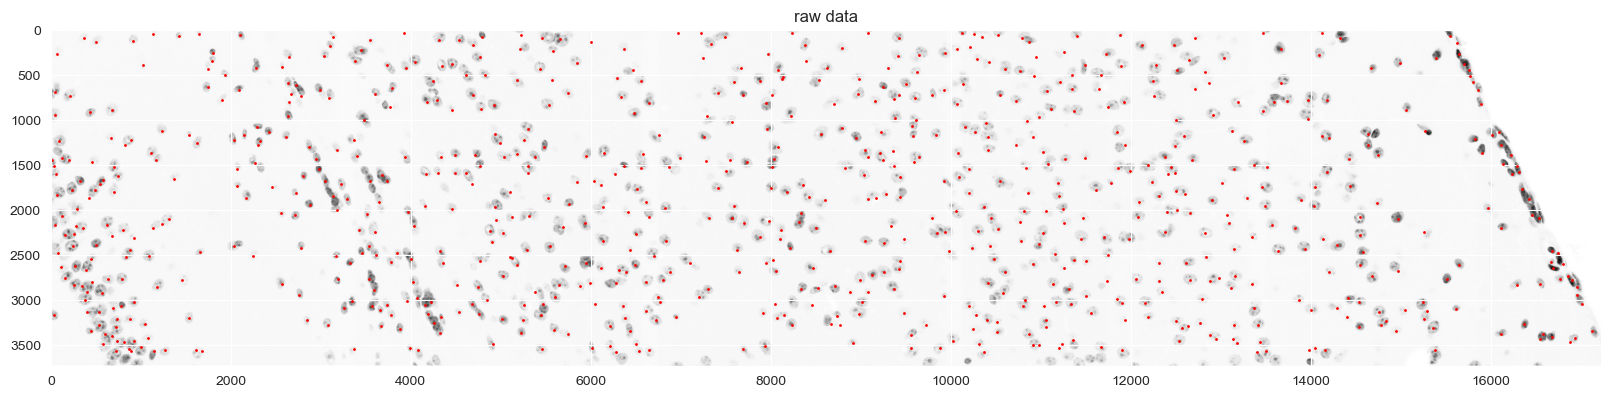

In [47]:
import matplotlib.pyplot as plt

xy_radius = 55
### overview
plt.figure(figsize=(20, 16))
length = 1000
plt.imshow(dapi, cmap='Greys')
# plt.scatter(spots['spot_location_1'], spots['spot_location_2'], s=0.01, color='r')
plt.scatter(x=adata.obsm['spatial'][:, 0], y=adata.obsm['spatial'][:, 1], s=1, color='r')
plt.title('raw data')

In [48]:
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=500)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata, zero_center=False, max_value=10)

C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:61: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


         Falling back to preprocessing with `sc.pp.pca` and default params.


C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\anndata\_core\anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprec

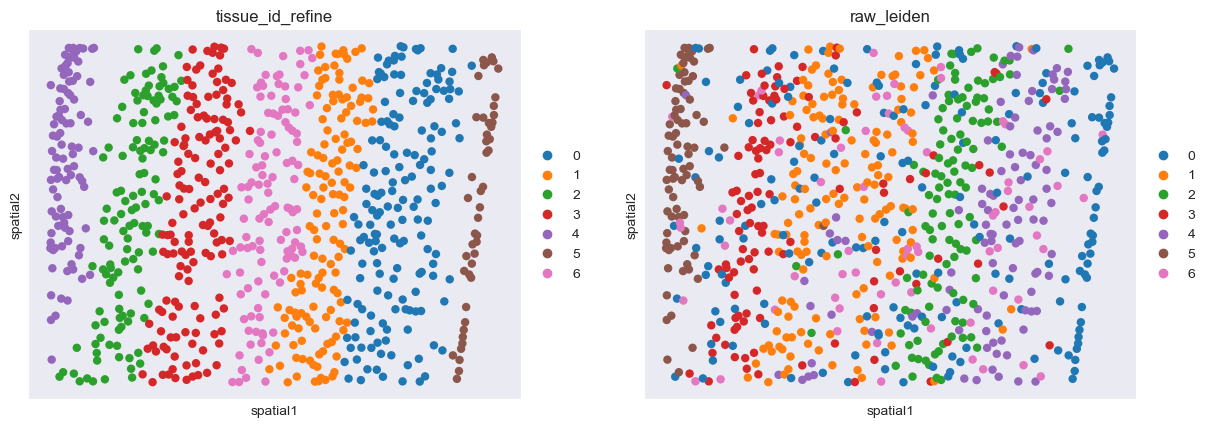

In [49]:
sc.pp.neighbors(adata)
sc.tl.leiden(adata, key_added='raw_leiden')
sc.pl.embedding(adata, basis='spatial', color=['tissue_id_refine', 'raw_leiden'])

[9080.84375   27.3125 ]


C:\Users\wangyu\AppData\Local\Temp\ipykernel_25332\1909563967.py:6: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(dapi[int(y - crop_size): int(y + crop_size), int(x - crop_size): int(x + crop_size)])


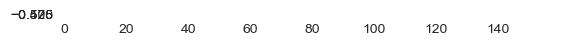

In [50]:
index = 100
crop_size = 80
print(adata.obsm['spatial'][index])
x = adata.obsm['spatial'][index][0]
y = adata.obsm['spatial'][index][1]
plt.imshow(dapi[int(y - crop_size): int(y + crop_size), int(x - crop_size): int(x + crop_size)])
plt.show()

In [51]:
loc_x = adata.obsm['spatial'][:, 0]
loc_y = adata.obsm['spatial'][:, 1]
loc_x.max(),loc_x.min(),loc_y.max(), loc_y.min()

(17120.43203883495, 19.107526881720432, 3577.5, 27.3125)

In [52]:
patches = []
crop_size = 80
for x, y in adata.obsm['spatial']:
    x_left = int(x - crop_size)
    x_right = int(x + crop_size)
    y_left = int(y - crop_size)
    y_right = int(y + crop_size)
    
    if x_left < 0:
        x_left = 0
        x_right = 2 * crop_size
    if y_left < 0:
        y_left = 0
        y_right = 2 * crop_size
    if x_right > loc_x.max():
        x_right = loc_x.max()
        x_left = loc_x.max() - 2 * crop_size
    if y_right > loc_y.max():
        y_right = loc_y.max()
        y_left = loc_y.max() - 2 * crop_size
    
    patches.append(dapi[int(y_left): int(y_right), int(x_left): int(x_right)])

In [53]:
for i in range(len(patches)):
    if patches[i].shape[0] == 0:
        print(i)

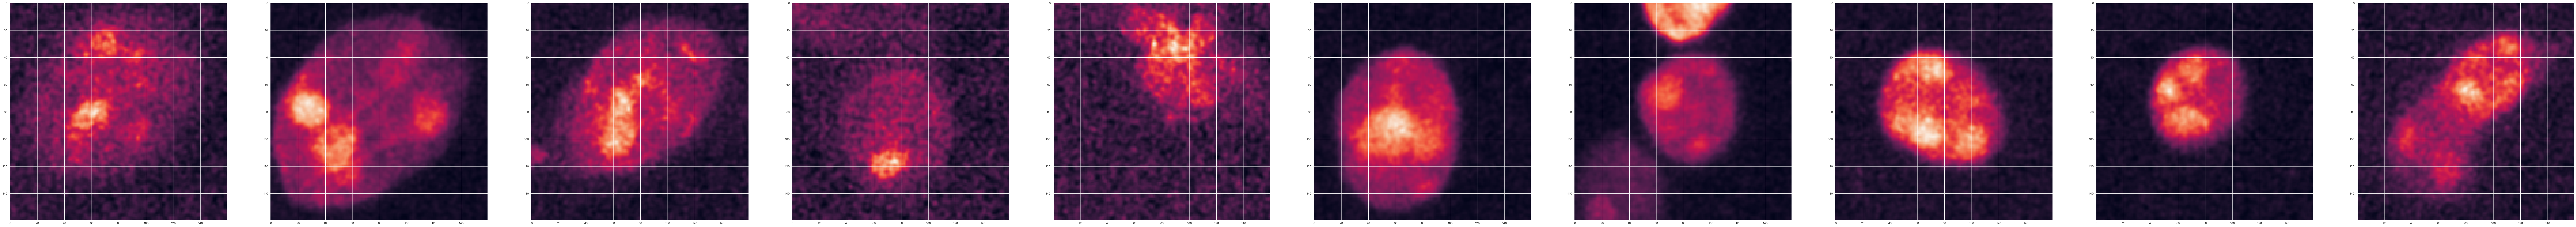

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(150, 15))
for i in range(10):
    axes[i].imshow(patches[2 * i])
plt.savefig('images/representative_cells.eps', format='eps', dpi=300)
plt.show()

In [55]:
patches[0].shape

(160, 160)

In [56]:
import torchvision.models as models
import torch.nn as nn
import torch
from torchtoolbox.transform import Cutout
from torchvision import transforms
from tqdm import tqdm

device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'

# 提取形态学特征
def load_cnn_model():
    image_encoder = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
    image_encoder.fc = nn.Identity()
    image_encoder = image_encoder.to(device)
    return image_encoder


img_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

aug_transform_list = [
            transforms.Grayscale(num_output_channels=3),
            # 随机从图像中剪切一块区域，用黑色填充，以增加模型对遮挡和噪声的鲁棒性
            Cutout(0.5),
            # 将图像转换为张量格式，方便后续神经网络的输入
            transforms.ToTensor(),
            # # 随机水平翻转图像，增加数据的多样性
            transforms.RandomHorizontalFlip(p=0.5),
            # # 随机垂直翻转图像，增加数据的多样性
            transforms.RandomVerticalFlip(p=0.5),
            # # 随机应用一种颜色扭曲变换，如随机改变亮度、对比度、饱和度等，增加数据的多样性, p=0.8表示有80%的概率进行颜色抖动变换
            transforms.RandomApply([transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8),
            # # 随机将图像转换为灰度图像，增加数据的多样性
            transforms.RandomGrayscale(p=0.2),
            # # 标准化图像像素值，以便网络更容易学习到图像之间的差异；该函数对输入数据进行归一化处理，有助于提高训练的效率和精度
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
aug_image_to_tensor = transforms.Compose(aug_transform_list)

model = load_cnn_model()
model.eval()
feature_df = []
aug_feature_df1 = []
aug_feature_df2 = []

with tqdm(total=len(patches), desc='Extract image feature', bar_format='{l_bar}{bar} [ time left: {remaining} ]', ) as pbar:
    for image_patch in patches:
        image_patch = Image.fromarray(image_patch)
        tensor = img_transform(image_patch)
        tensor = tensor.reshape(1, 3, crop_size * 2, crop_size * 2)
        tensor = tensor.to(device)
        result = model(tensor)
        result_npy = result.data.cpu().numpy().ravel()
        feature_df.append(result_npy)

        aug_tensor1 = aug_image_to_tensor(image_patch)
        aug_tensor1 = aug_tensor1.reshape(1, 3, crop_size * 2, crop_size * 2)
        aug_tensor1 = aug_tensor1.to(device)
        result = model(aug_tensor1)
        result_npy = result.data.cpu().numpy().ravel()
        aug_feature_df1.append(result_npy)

        aug_tensor2 = aug_image_to_tensor(image_patch)
        aug_tensor2 = aug_tensor2.reshape(1, 3, crop_size * 2, crop_size * 2)
        aug_tensor2 = aug_tensor2.to(device)
        result = model(aug_tensor2)
        result_npy = result.data.cpu().numpy().ravel()
        aug_feature_df2.append(result_npy)
        pbar.update(1)

Extract image feature: 100%|██████████ [ time left: 00:00 ]


In [57]:
import numpy as np
from sklearn.decomposition import PCA

feature_df = np.array(feature_df)
adata.obsm['image_feature'] = feature_df
print("The image feature is added to adata.obsm['image_feature']")

aug_feature_df = np.array(aug_feature_df1)
adata.obsm['aug_image_feature1'] = aug_feature_df
aug_feature_df = np.array(aug_feature_df2)
adata.obsm['aug_image_feature2'] = aug_feature_df
print("The augment image feature is added to adata.obsm['aug_image_feature']")

pca = PCA(n_components=100, random_state=42)
image_feature_pca = pca.fit_transform(feature_df)
adata.obsm['image_feat_pca'] = image_feature_pca
print("The pca result of image features is added to adata.obsm['image_feat_pca']")

The image feature is added to adata.obsm['image_feature']
The augment image feature is added to adata.obsm['aug_image_feature']
The pca result of image features is added to adata.obsm['image_feat_pca']


In [58]:
pca.explained_variance_ratio_.sum()

0.93906957

In [59]:
import phenograph
graph_label, _, _ = phenograph.cluster(image_feature_pca)
adata.obs['graph_label'] = graph_label
adata.obs['graph_label'] = adata.obs['graph_label'].astype('category')

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.2687666416168213 seconds
Jaccard graph constructed in 2.6447649002075195 seconds
Wrote graph to binary file in 0.007999658584594727 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.667769
After 2 runs, maximum modularity is Q = 0.678941
After 5 runs, maximum modularity is Q = 0.68009
After 14 runs, maximum modularity is Q = 0.681666
Louvain completed 34 runs in 2.306835174560547 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 6.222390174865723 seconds


C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\P

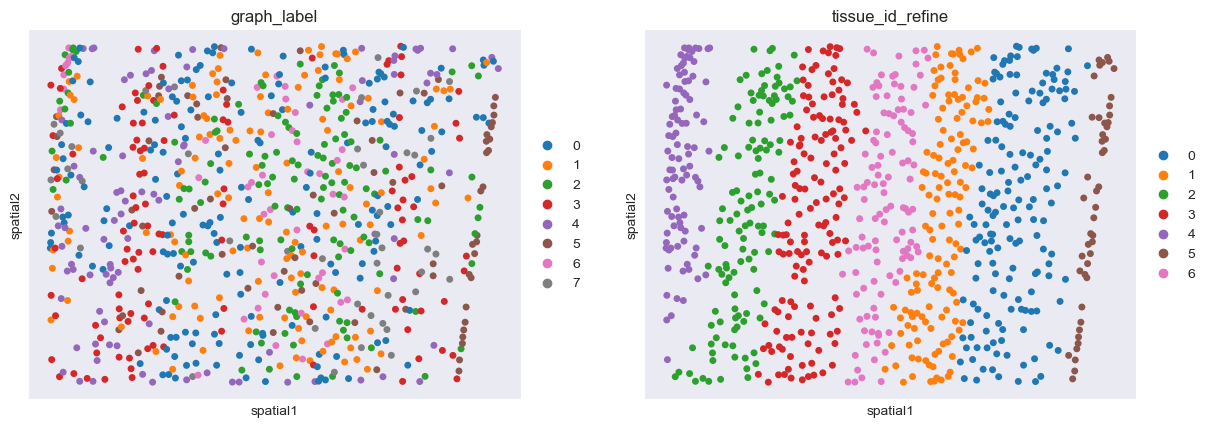

0.05760063603131879

In [61]:
sc.pl.embedding(adata, basis='spatial', color=['graph_label', 'tissue_id_refine'], size=100)
adjusted_rand_score(adata.obs['tissue_id_refine'], adata.obs['graph_label'])

In [66]:
from utils import construction_interaction
from sklearn.metrics import pairwise_distances

k_nei = 20
construction_interaction(adata, n_neighbor=k_nei)
adj = adata.obsm['adj']

morphological_similarity = 1 - pairwise_distances(np.array(adata.obsm['image_feat_pca']), metric='cosine')
morphological_similarity[morphological_similarity < 0] = 0

adj_spatial_mor = adj * morphological_similarity

In [67]:
# 数据增广
from scipy.sparse import csr_matrix

if isinstance(adata.X, csr_matrix):
    gene_matrix = adata.X.A
elif isinstance(adata.X, np.ndarray):
    gene_matrix = adata.X
elif isinstance(adata.X, pd.DataFrame):
    gene_matrix = adata.X.values
else:
    raise ValueError(f"{type(adata.X)} is not a valid type here")

# 各个Spot对当前Spot归一化后的权重
weights_list = []
final_coordinates = []

for i in range(adata.shape[0]):
    current_spot = adj_spatial_mor[i].argsort()[-k_nei: ]
    spot_weight = adj_spatial_mor[i][current_spot]
    spot_feature_matrix = gene_matrix[current_spot]
    
    spot_weight_scaled = spot_weight / spot_weight.sum()
    weights_list.append(spot_weight_scaled)
    spot_matrix_scaled = np.multiply(spot_weight_scaled.reshape(-1, 1), spot_feature_matrix)
    spot_matrix_final = np.sum(spot_matrix_scaled, axis=0)
    final_coordinates.append(spot_matrix_final)

In [68]:
from sklearn.decomposition import PCA

adjacent_spot_data = np.array(final_coordinates)
adjacent_weight = 0.3

if isinstance(adata.X, np.ndarray):
    augment_gene_matrix = adata.X + adjacent_weight * adjacent_spot_data.astype(float)
elif isinstance(adata.X, csr_matrix):
    augment_gene_matrix = adata.X.A + adjacent_weight * adjacent_spot_data.astype(float)
    
pca = PCA(n_components=50, random_state=42)
aug_pca = pca.fit_transform(augment_gene_matrix)

In [69]:
aug_label, _, _ = phenograph.cluster(aug_pca)
adata.obs['aug_data'] = aug_label
adata.obs['aug_data'] = adata.obs['aug_data'].astype('category')

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.04808783531188965 seconds
Jaccard graph constructed in 2.0934107303619385 seconds
Wrote graph to binary file in 0.007999897003173828 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.706248
Louvain completed 21 runs in 1.113260269165039 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 4.056115627288818 seconds


C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\P

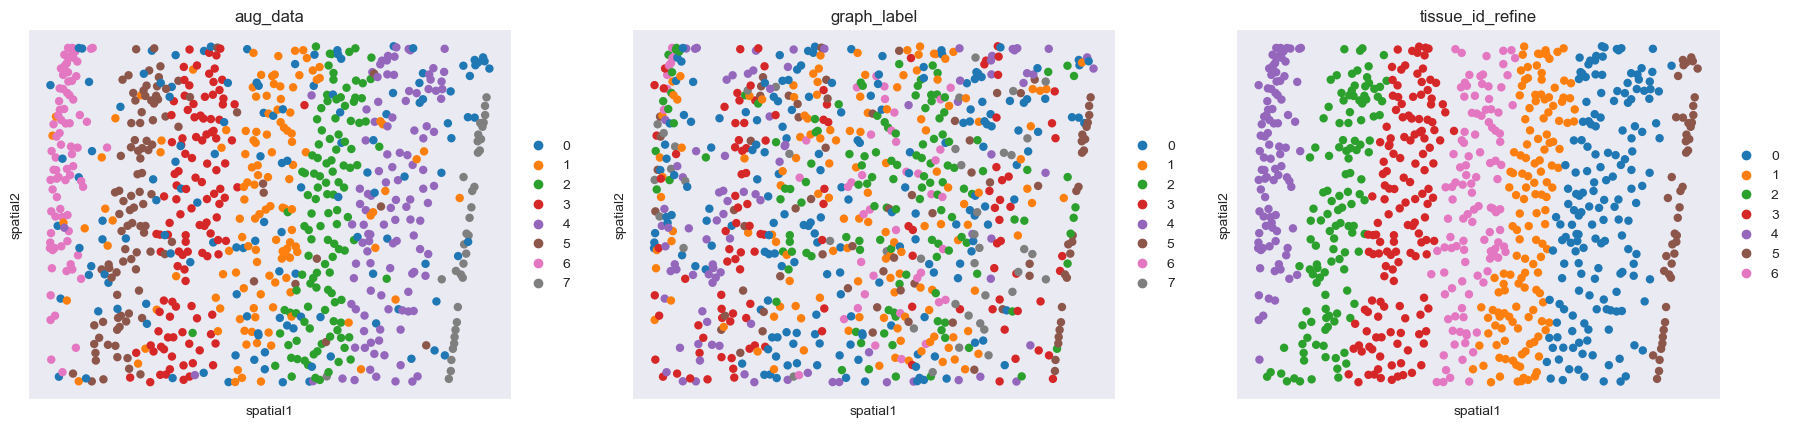

In [70]:
sc.pl.embedding(adata, basis='spatial', color=['aug_data', 'graph_label', 'tissue_id_refine'])

In [71]:
adjusted_rand_score(adata.obs['aug_data'], adata.obs['tissue_id_refine'])

0.5162979015785512

In [72]:
from utils import *

device = torch.device('cuda') if torch.cuda.is_available() else 'cpu'
print(device)
adata.obsm['augment_gene_data'] = augment_gene_matrix
add_contrastive_label(adata)
get_feature(adata)

features = torch.FloatTensor(adata.obsm['feat'].copy()).to(device)
features_fake = torch.FloatTensor(adata.obsm['feat_fake'].copy()).to(device)
label_CSL = torch.FloatTensor(adata.obsm['label_CSL']).to(device)

dim_input = features.shape[1]
dim_output = 64

adj = preprocess_adj(adj_spatial_mor)
adj = torch.FloatTensor(adj).to(device)

cuda


In [83]:
from utils import preprocess_adj
from torchtoolbox.tools import mixup_criterion
from loss import Objective
from model import OurModel
import torch.nn.functional as F

image_feature = torch.FloatTensor(adata.obsm['image_feature']).to(device)
aug_image_feature1 = torch.FloatTensor(adata.obsm['aug_image_feature1']).to(device)
aug_image_feature2 = torch.FloatTensor(adata.obsm['aug_image_feature2']).to(device)


model = OurModel(gene_dims=[adata.shape[1], 64], img_dims=[adata.obsm['image_feature'].shape[1], 64], graph_nei=adj, project_dims=[64, dim_output]).to(device)

loss_CSL = nn.BCEWithLogitsLoss()
loss_cont = Objective(batch_size=adata.shape[0])

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.)
print('Begin to train ST data...')

alpha = 1
beta = 10
gamma = 0
# sigma = min(alpha, (1 - alpha))
sigma = 1

model.train()
pre_epoch = 2500
cont_epoch =500
if alpha == 0:
    total_epoch = pre_epoch
else:
    total_epoch = pre_epoch + cont_epoch

epoch_iter = tqdm(range(total_epoch))
for epoch in epoch_iter:
    # zg, zi, aug_zi, hg, hi, aug_hi, dis_a, dis_b, rec_gene
    latent_gene, latent_img, latent_aug_img1, latent_aug_img2, high_gene, high_img, high_aug_img1, high_aug_img2, ret, ret_fake, rec_data, rec_img = model.forward(features, features_fake, image_feature, image_feature, image_feature, adj)
    loss_sl_1 = loss_CSL(ret, label_CSL)
    loss_sl_2 = loss_CSL(ret_fake, label_CSL)
    loss_g2g = loss_sl_1 + loss_sl_2

    loss_feat = F.mse_loss(features, rec_data)
    loss_img = F.mse_loss(image_feature, rec_img)
    
    loss_recon =  loss_feat + alpha * loss_img
    if epoch < pre_epoch:
        loss = loss_recon + beta * loss_g2g
    else:
        loss_i2i = loss_cont(high_aug_img1, high_aug_img2)
        lam = np.random.beta(0.2, 0.2)
        loss_i2g = mixup_criterion(loss_cont, high_gene, high_img, high_aug_img1, lam)
        loss = loss_recon + beta * (loss_sl_1 + loss_sl_2) + gamma * loss_i2i + sigma * loss_i2g
        
    if epoch == pre_epoch:
        print(f"# Epoch {epoch}, loss: {loss.item():.3f}, g2g_loss: {loss_g2g.item():.3f}, gene_recon: {loss_feat.item():.3f}, image_recon: {loss_img.item():.3f}")
        print('Init finished, start contrastive learning part')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch < pre_epoch:
        epoch_iter.set_description(
        f"# Epoch {epoch}, loss: {loss.item():.3f}, g2g_loss: {loss_g2g.item():.3f}, gene_recon: {loss_feat.item():.3f}, image_recon: {loss_img.item():.3f}")
    else:
        epoch_iter.set_description(
        f"# Epoch {epoch}, loss: {loss.item():.3f}, g2i_loss: {loss_i2g.item():.3f}, g2g_loss: {loss_g2g.item():.3f}, i2i_loss: {loss_i2i.item():.3f}, gene_recon: {loss_feat.item():.3f}, image_recon: {loss_img.item():.3f}")
print('Optimization finished for ST data!')

Begin to train ST data...


# Epoch 2502, loss: 68.816, g2i_loss: 67.188, g2g_loss: 0.064, i2i_loss: 6.497, gene_recon: 0.982, image_recon: 0.006:  83%|████████▎ | 2494/3000 [00:10<00:01, 256.66it/s]

# Epoch 2500, loss: 97.056, g2g_loss: 0.038, gene_recon: 0.861, image_recon: 0.005
Init finished, start contrastive learning part


# Epoch 2999, loss: 3.867, g2i_loss: 2.365, g2g_loss: 0.061, i2i_loss: 2.098, gene_recon: 0.869, image_recon: 0.022: 100%|██████████| 3000/3000 [00:46<00:00, 64.58it/s]   

Optimization finished for ST data!


In [84]:
# 根据pretrain好的model,计算latent
with torch.no_grad():
    model.eval()
    latent_gene, latent_img, latent_aug_img1, latent_aug_img2, high_gene, high_img, high_aug_img1, high_aug_img2, ret, ret_fake, rec_data, rec_img = model.forward(features, features_fake, image_feature, aug_image_feature1, aug_image_feature1, adj)
    # latent_gene, rec_feature, _, _ = model.forward(features, features_fake, adj)
    latent_gene = latent_gene.detach().cpu().numpy()
    latent_img = latent_img.detach().cpu().numpy()
    high_img = high_img.detach().cpu().numpy()
    rec_data = rec_data.detach().cpu().numpy()
    rec_img = rec_img.detach().cpu().numpy()

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=2023)
rec_feat_pca = pca.fit_transform(rec_data)
rec_img_pca = pca.fit_transform(rec_img)
adata.obsm['rec_feat_pca'] = rec_feat_pca
adata.obsm['rec_img_pca'] = rec_img_pca
adata.obsm['morp_main_pca'] = rec_img_pca
adata.obsm['morp_main_latent'] = latent_img

rec_data.shape, rec_feat_pca.shape, rec_img_pca.shape

((817, 1020), (817, 20), (817, 20))

In [86]:
adata.obsm['final_emb'] = rec_feat_pca + alpha * rec_img_pca

In [87]:
import os
from utils import mclust_R

os.environ['R_HOME'] = 'C:/Program Files/R/R-4.3.1'

mclust_R(adata, used_obsm='final_emb', num_cluster=7)
ARI = adjusted_rand_score(adata.obs['mclust'], adata.obs['tissue_id_refine'])
print("ARI: ", ARI)

fitting ...
  |======================================================================| 100%
ARI:  0.6523071057967214


C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\ProgramData\anaconda3\envs\gpudeepl\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\P

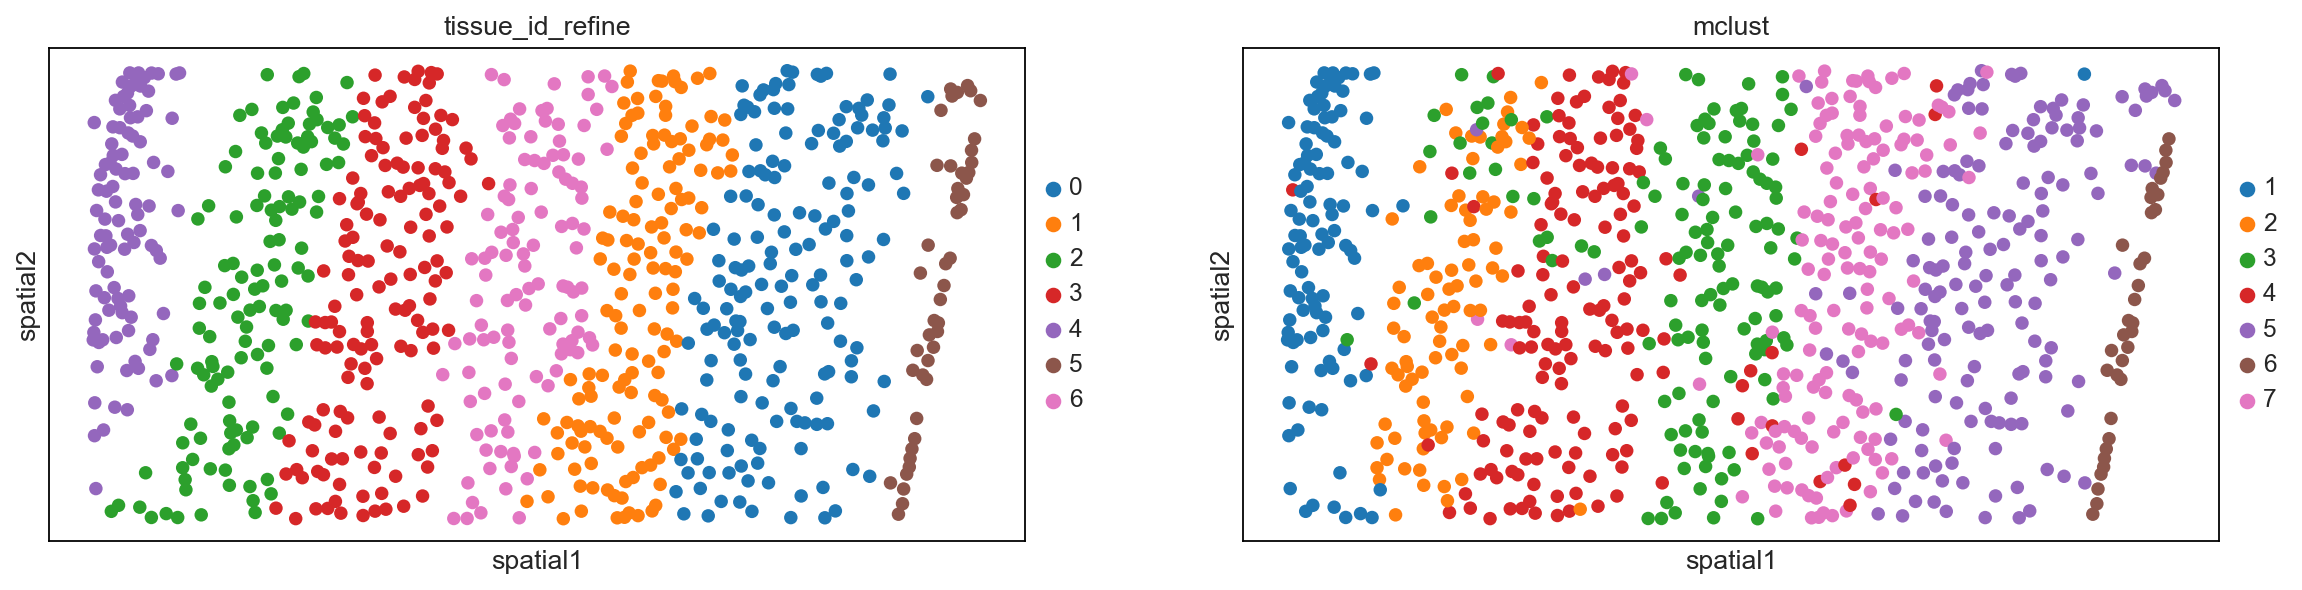

In [130]:
sc.pl.embedding(adata, basis='spatial', color=['tissue_id_refine', 'mclust'], save='MuCST_STARMAP')